# Exploratory data analysis

In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [122]:
df=pd.read_csv('C:\\Users\\snehu\\OneDrive\\Desktop\\git_projects\\Learn_ml\\DAY4_analysis\\Placement_data_full_class.csv')
df.drop(columns=['sl_no'],inplace=True)

In [123]:
df.sample(3)

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
38,F,73.0,Others,58.0,Others,Science,66.0,Comm&Mgmt,No,53.70,Mkt&HR,56.86,Placed,240000.0
130,M,62.0,Central,65.0,Others,Commerce,60.0,Comm&Mgmt,No,84.00,Mkt&Fin,64.15,Not Placed,NaN
161,M,55.6,Others,51.0,Others,Commerce,57.5,Comm&Mgmt,No,57.63,Mkt&HR,62.72,Not Placed,NaN


In [124]:
df.shape

(215, 14)

In [125]:
df.describe()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          215 non-null    object 
 1   ssc_p           215 non-null    float64
 2   ssc_b           215 non-null    object 
 3   hsc_p           215 non-null    float64
 4   hsc_b           215 non-null    object 
 5   hsc_s           215 non-null    object 
 6   degree_p        215 non-null    float64
 7   degree_t        215 non-null    object 
 8   workex          215 non-null    object 
 9   etest_p         215 non-null    float64
 10  specialisation  215 non-null    object 
 11  mba_p           215 non-null    float64
 12  status          215 non-null    object 
 13  salary          148 non-null    float64
dtypes: float64(6), object(8)
memory usage: 23.6+ KB


In [127]:
df.isnull().sum()['salary']/df.shape[0]

0.3116279069767442

In [128]:
df.dropna(inplace=True)

In [129]:
cat_feature=[feature for feature in df.columns if df[feature].dtype=="object"]
cat_feature

['gender',
 'ssc_b',
 'hsc_b',
 'hsc_s',
 'degree_t',
 'workex',
 'specialisation',
 'status']

In [130]:
num_feature=[feature for feature in df.columns if df[feature].dtype!="object"]
num_feature

['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary']

# Univariate analysis

Categorical features

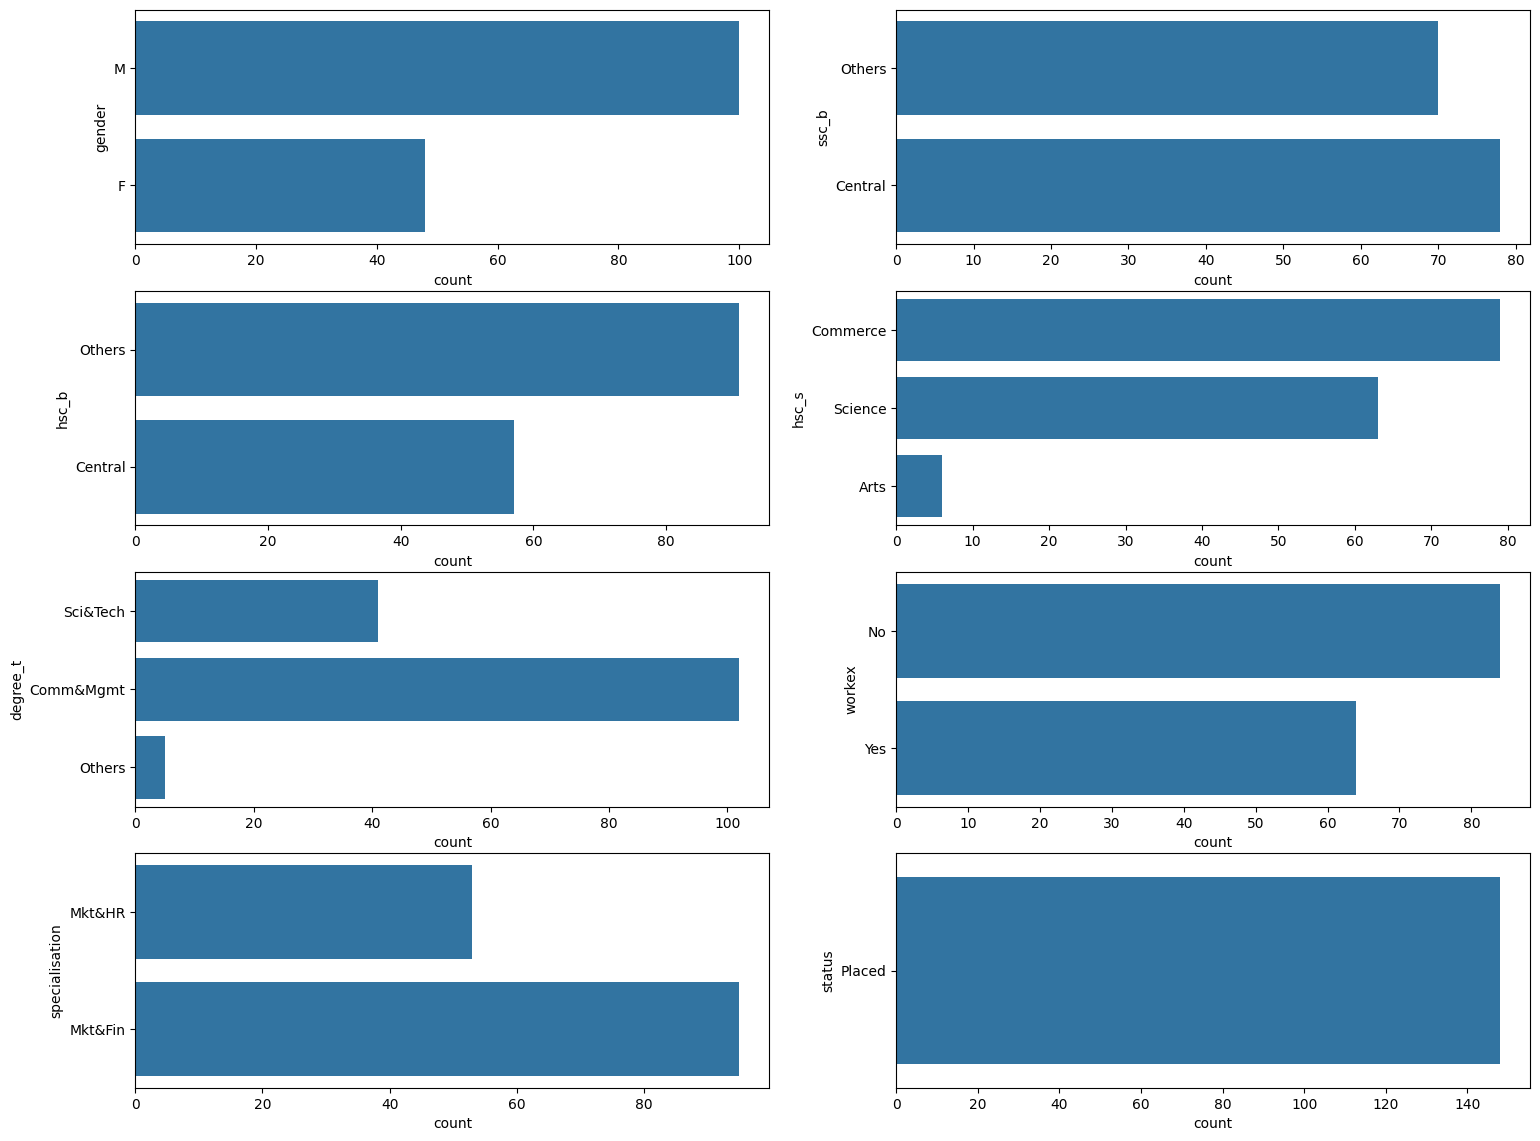

In [131]:
plt.figure(figsize=(18,14))
for i,col in enumerate(cat_feature,start=1):
    plt.subplot(4,2,i)
    sns.countplot(df[col])

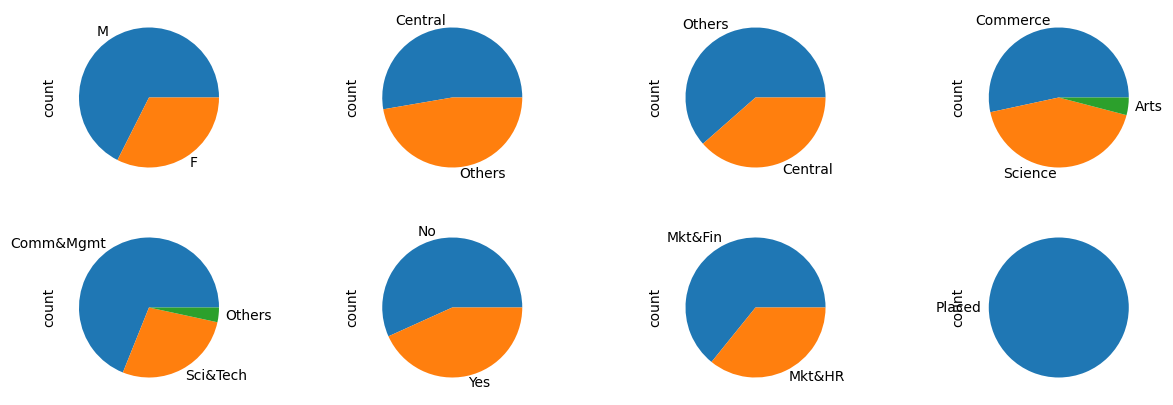

In [132]:
plt.figure(figsize=(15,5))
for i,col in enumerate(cat_feature,start=1):
    plt.subplot(2,4,i)
    df[col].value_counts().plot(kind='pie')

Numerical features

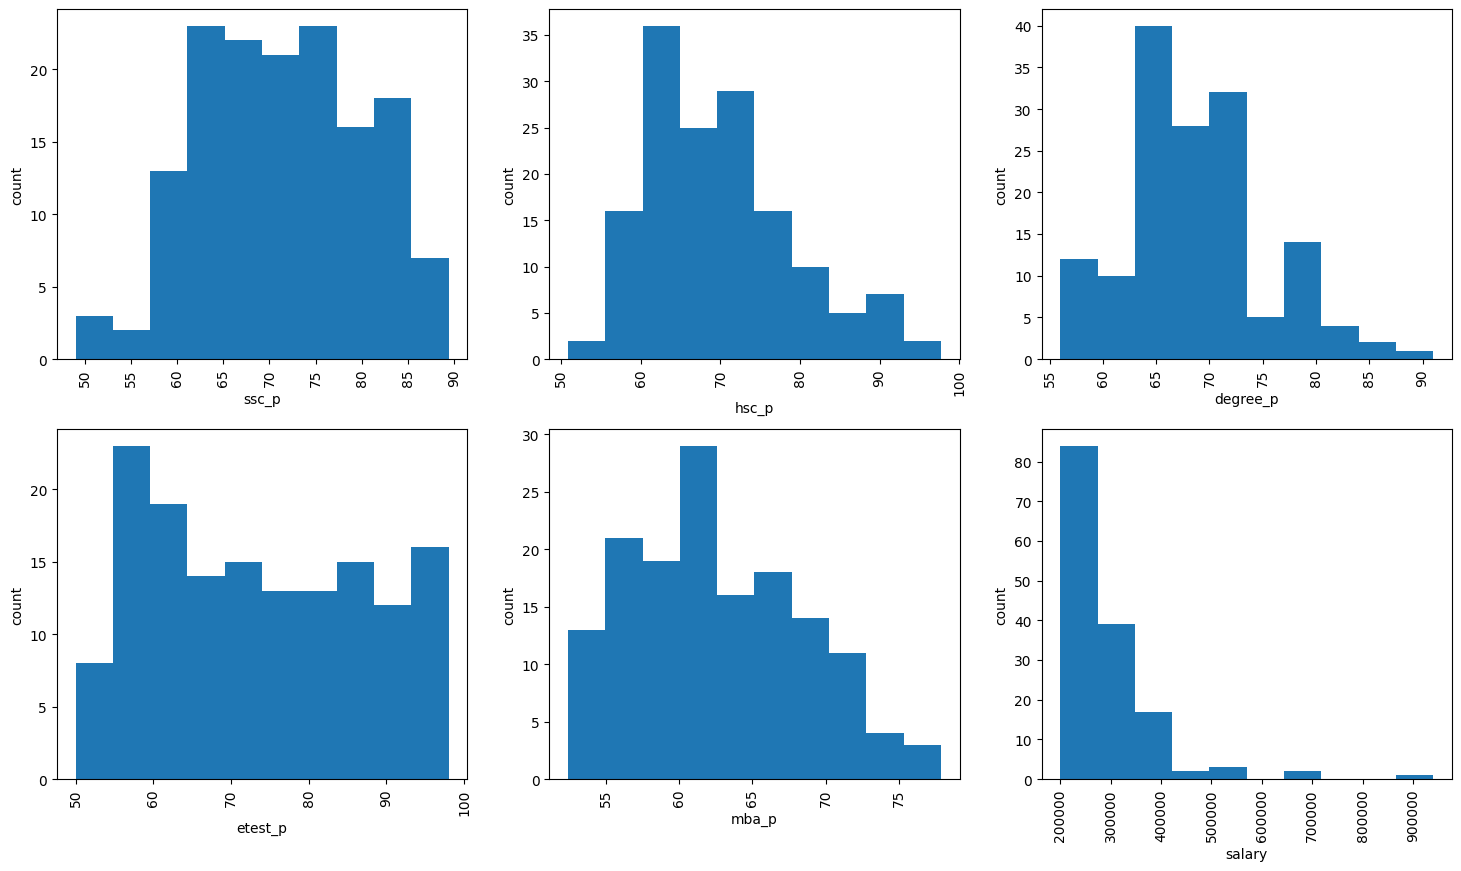

In [133]:
plt.figure(figsize=(18,10))
for i,col in enumerate(num_feature,start=1):
    plt.subplot(2,3,i)
    plt.hist(df[col])
    plt.xlabel(col)
    plt.ylabel('count')
    plt.xticks(rotation=90)

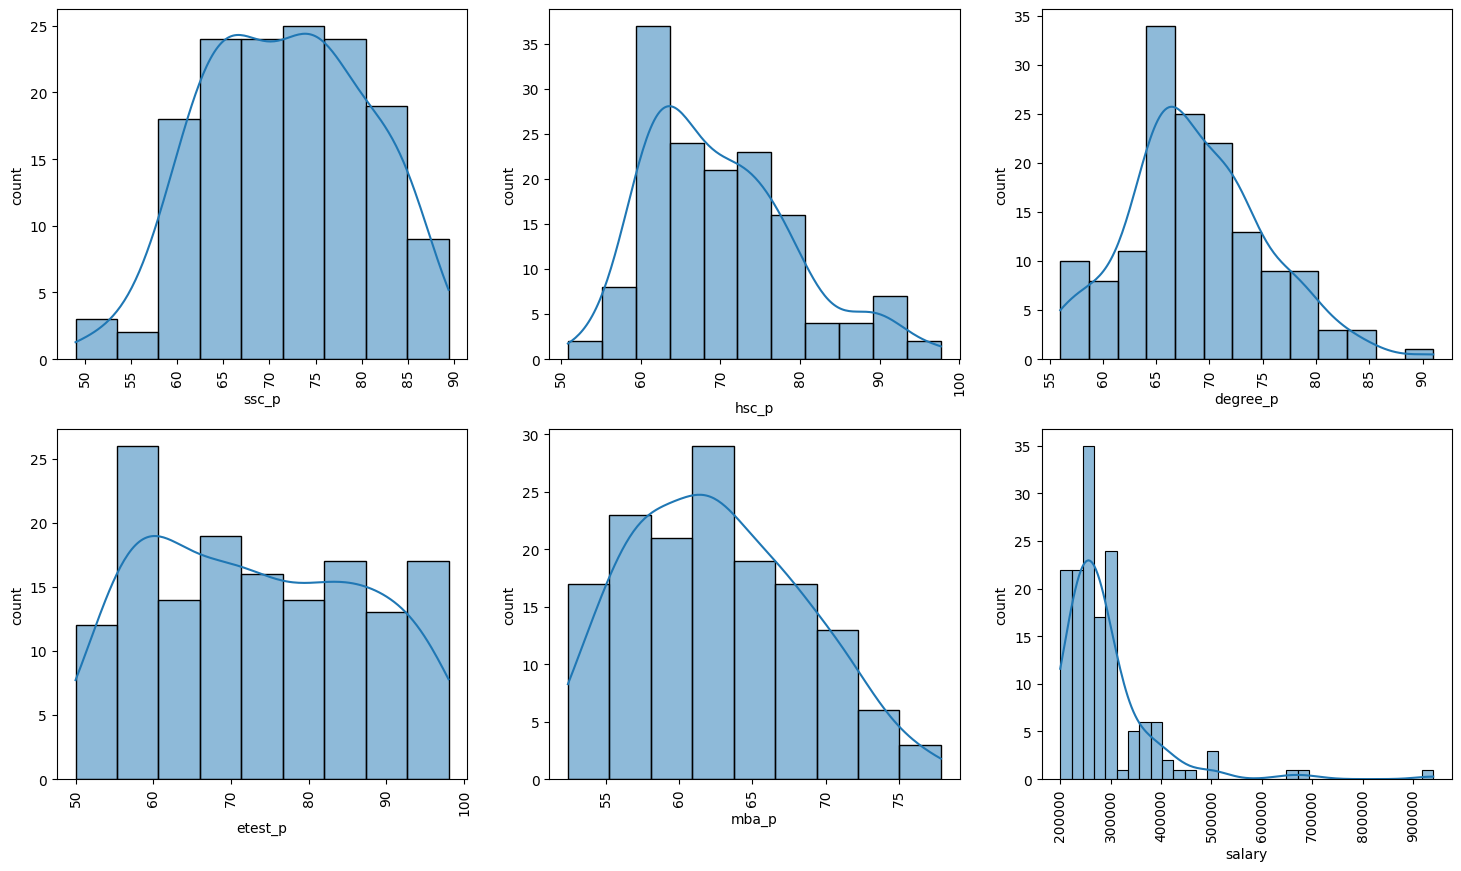

In [134]:
plt.figure(figsize=(18,10))
for i,col in enumerate(num_feature,start=1):
    plt.subplot(2,3,i)
    sns.histplot(data=df[col], kde=True)
    plt.xlabel(col)
    plt.ylabel('count')
    plt.xticks(rotation=90)

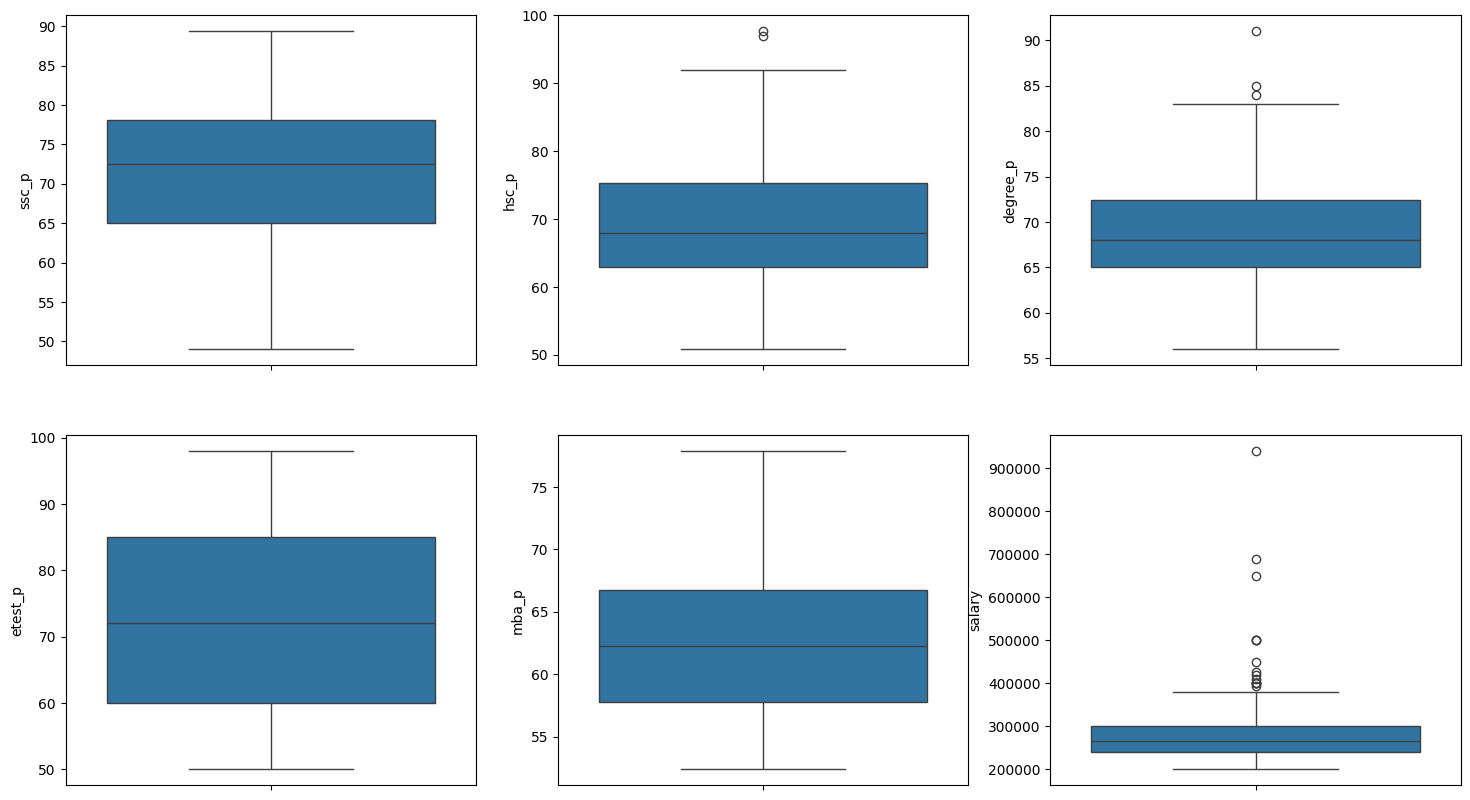

In [135]:
plt.figure(figsize=(18,10))
for i,col in enumerate(num_feature,start=1):
    plt.subplot(2,3,i)
    sns.boxplot(df[col])
    plt.xticks(rotation=90)

# Bivariate/Multivariate analysis

In [136]:
df.sample(3)

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
112,M,58.0,Others,61.0,Others,Commerce,61.0,Comm&Mgmt,No,58.00,Mkt&HR,53.94,Placed,250000.0
117,M,77.0,Others,75.0,Others,Science,73.0,Sci&Tech,No,80.00,Mkt&Fin,67.05,Placed,240000.0
66,M,83.0,Others,74.0,Others,Science,66.0,Comm&Mgmt,No,68.92,Mkt&HR,58.46,Placed,275000.0


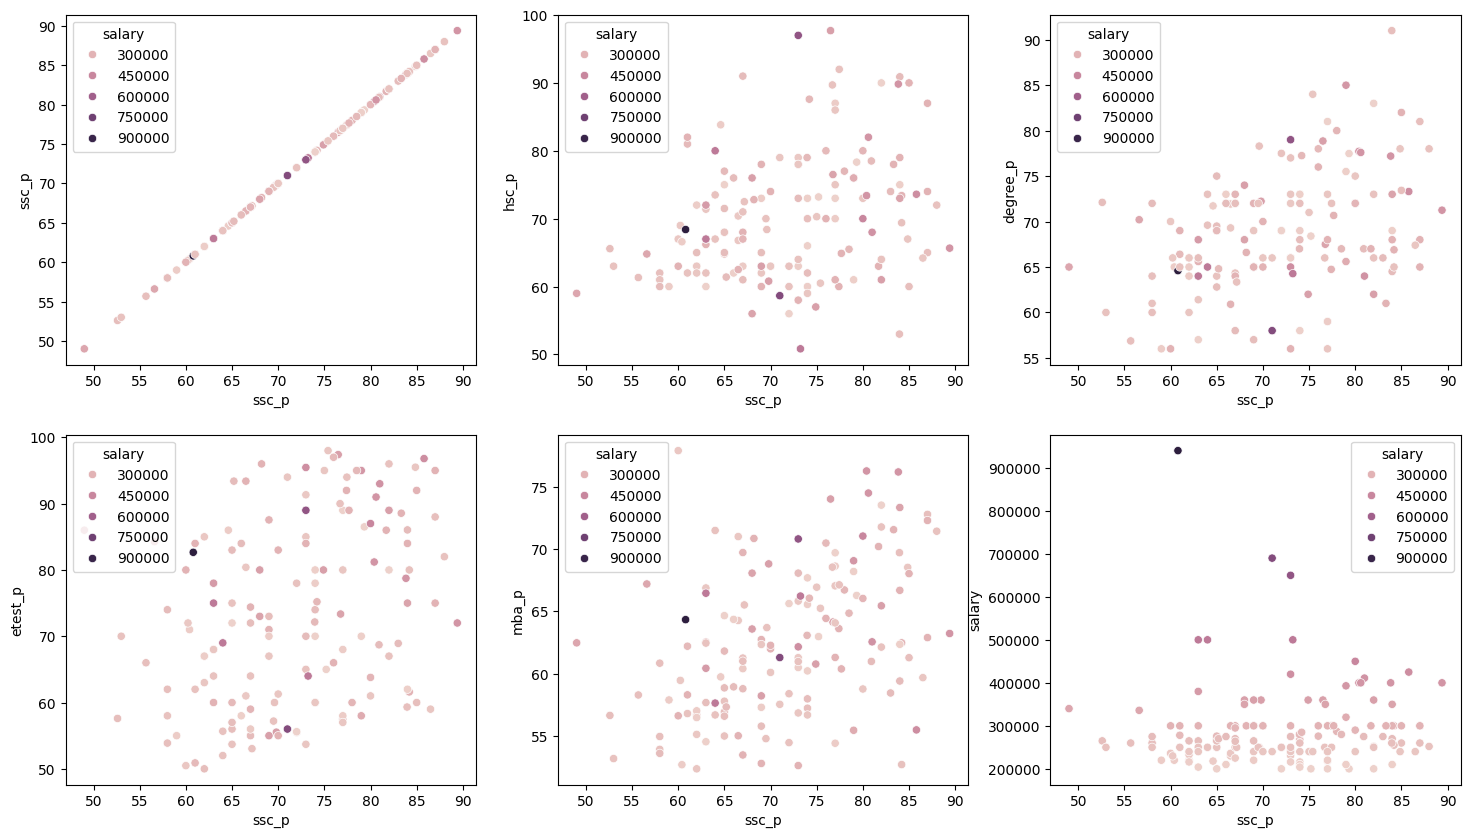

In [137]:
plt.figure(figsize=(18,10))
for i,col in enumerate(num_feature,start=1):
    plt.subplot(2,3,i)
    sns.scatterplot(x=df['ssc_p'],y=df[col],hue=df['salary'])

<Axes: xlabel='degree_t', ylabel='ssc_p'>

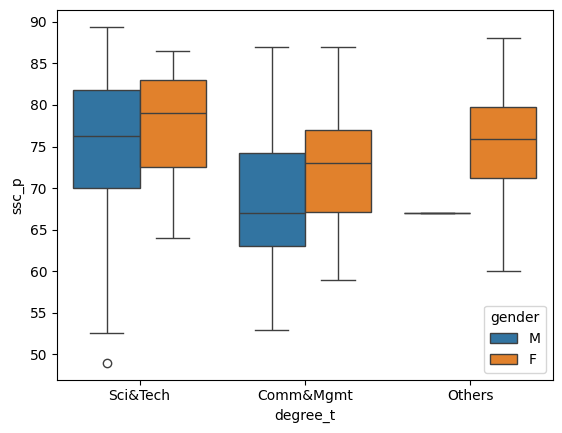

In [138]:
sns.boxplot(x=df['degree_t'],y=df['ssc_p'],hue=df['gender'])

<Axes: xlabel='degree_t', ylabel='ssc_p'>

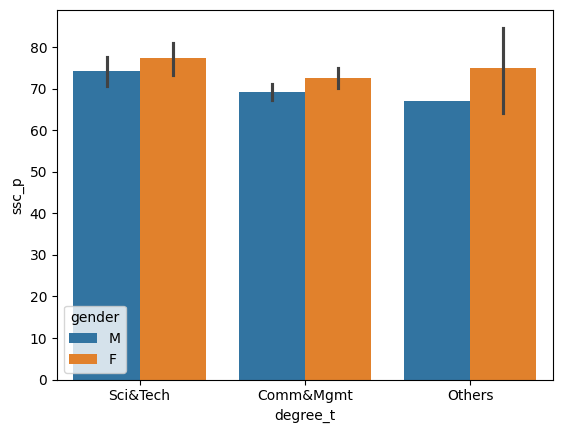

In [139]:
sns.barplot(x=df['degree_t'],y=df['ssc_p'],hue=df['gender'])

<Axes: xlabel='degree_t', ylabel='gender'>

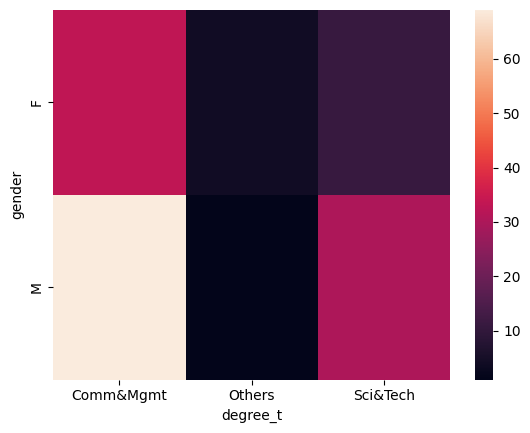

In [140]:
sns.heatmap(pd.crosstab(df['gender'],df['degree_t']))

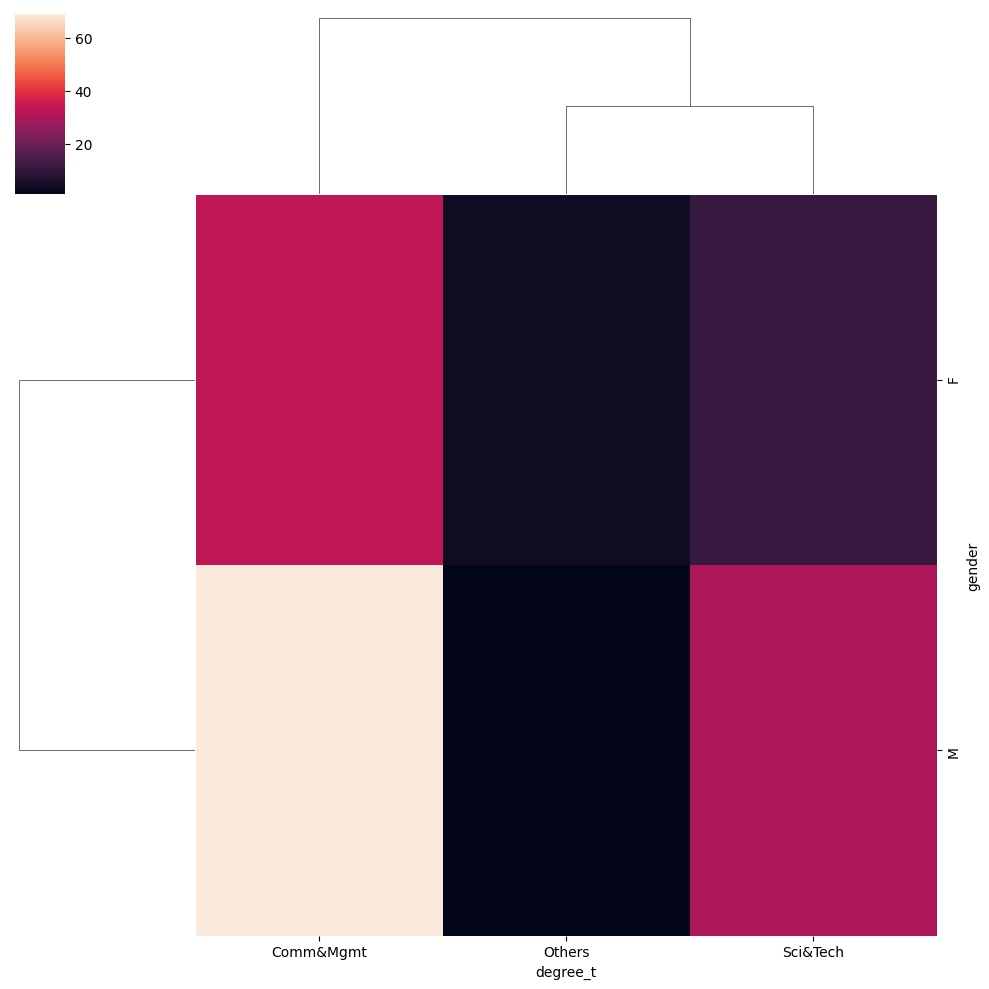

In [141]:
sns.clustermap(pd.crosstab(df['gender'],df['degree_t']))